# Assignment 4

### 1. 复习上课内容以及复现课程代码

在本部分，你需要复习上课内容和课程代码后，自己复现课程代码。

### 2. 回答一下理论题目

#### 1. What does a neuron compute?

####  2. Why we use non-linear activation funcitons in neural networks?

#### 3. What is the 'Logistic Loss' ?

#### 4. Assume that you are building a binary classifier for detecting if an image containing cats, which activation functions would you recommen using for the output layer ?

A. ReLU    
B. Leaky ReLU    
C. sigmoid    
D. tanh  

#### 5. Why we don't use zero initialization for all parameters ?

#### 6. Can you implement the softmax function using python ? 

### 3.实践题

#### In this practical part, you will build a simple digits recognizer to check if the digit in the image is larger than 5. This assignmnet will guide you step by step to finish your first small project in this course .

#### 1 - Packages  
sklearn is a famous package for machine learning.   
matplotlib is a common package for vasualization.

In [10]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import numpy as np

%matplotlib inline

#### 2 - Overvie of the dataset  
    - a training set has m_train images labeled as 0 if the digit < 5 or 1 if the digit >= 5
    - a test set contains m_test images labels as if the digit < 5 or 1 if the digit >= 5
    - eah image if of shape (num_px, num_px ). Thus, each image is square(height=num_px and  width = num_px)

In [5]:
# Loading the data 
digits = datasets.load_digits()

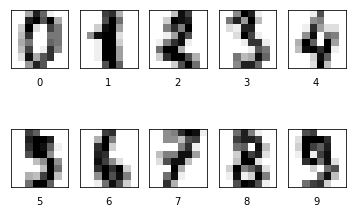

In [6]:
# Vilizating the data
for i in range(1,11):
    plt.subplot(2,5,i)
    plt.imshow(digits.data[i-1].reshape([8,8]),cmap=plt.cm.gray_r)
    plt.text(3,10,str(digits.target[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [8]:
# reformulate the label. 
# If the digit is smaller than or equal to 5, the label is 0.
# If the digit is larger than 5, the label is 1.

y_train[y_train < 5 ] = 0
y_train[y_train >= 5] = 1
y_test[y_test < 5] = 0
y_test[y_test >= 5] = 1

In [81]:
X_train[0]

array([ 0.,  8., 16., 12., 15., 16.,  7.,  0.,  0., 13., 16., 14.,  6.,
        4.,  1.,  0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
       16., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  6., 15.,  9.,  0.,  0.,
        0.,  0.,  0.,  0.,  4., 16.,  2.,  0.,  0.,  0.,  1.,  4.,  6.,
       16.,  5.,  0.,  0.,  0.,  7., 16., 16., 10.,  0.,  0.,  0.])

In [82]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 64)
(450, 64)
(1347,)
(450,)


#### 3- Architecture of the neural network

![title](./networks.png)

In [83]:
!pwd

'pwd' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


##### Mathematical expression of the algorithm:

For one example $x^{(i)}$:   
 $$ z^{(i)} = w^T * x^{(i)} +b $$   
 $$ y^{(i)} = a^{(i)} = sigmoid(z^{(i)})$$   
 $$L(a^{(i)},y^{(i)}) = -y^{(i)} log(a^{(i)})-(1-y^{(i)})log(1-a^{(i)})$$

The total cost over all training examples:
$$ J = \frac{1}{m}\sum_{i=1}^{m}L(a^{(i)},y^{(i)}) $$

#### 4 - Building the algorithm

##### 4.1- Activation function    
###### Exercise:
Finish the sigmoid funciton 

In [85]:
def sigmoid(z):
    '''
    Compute the sigmoid of z
    Arguments: z -- a scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    '''
    s = 1.0 / (1+np.exp(-z))
    
    return s

测试

In [86]:
# Test your code 
# The result should be [0.5 0.88079708]
print("sigmoid([0,2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


##### 4.1-Initializaing parameters
###### Exercise:
Finishe the initialize_parameters function below

In [87]:
# Random innitialize the parameters

def initialize_parameters(dim):
    '''
    Argument: dim -- size of the w vector
    
    Returns:
    w -- initialized vector of shape (dim,1)
    b -- initializaed scalar
    '''
    
    w = np.random.randn(dim, 1)
    b = 0.0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

测试

In [88]:
# Test your code 
print("initialize_parameters(16) = " + str(initialize_parameters(16)))

initialize_parameters(16) = (array([[-0.58161697],
       [-0.558307  ],
       [ 0.65067727],
       [ 0.24940835],
       [-0.7131904 ],
       [ 0.32311229],
       [-0.64950876],
       [-0.17516594],
       [-0.70699035],
       [ 0.05508082],
       [-0.60420018],
       [-0.115474  ],
       [-0.74706057],
       [-0.58078459],
       [-0.70989153],
       [ 0.85520063]]), 0.0)


#### 4.3-Forward and backward propagation

###### Some mathematical expressions
Forward Propagation:   
. X    
. A = $\sigma(w^T*X+b) = (a^{(1)},a^{(2)},...,a^{(m)})$   
. J = $-\frac{1}{m} \sum_{i=1}^{m}y^{(i)}log(a^{(i)})+(1-y^{(i)})log(1-a^{(i)})$       

Some derivative: 
$$\frac{\partial{J}}{\partial{w}} = \frac{1}{m}X*(A-Y)^T$$   
$$\frac{\partial{J}}{\partial{b}} = \frac{1}{m}\sum_{i=1}^m(a^{(i)}-y^{(i)}) $$

###### Exercise:
Finish the function below:

In [116]:
def propagate(w,b,X,Y):
    '''
    Implement the cost function and its gradient for the propagation
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    '''
    # 防止cost计算中np.log(0)*0 出现nan
    epsilon = 1e-9
    
    m = X.shape[1]
    A = sigmoid(np.dot(X,w) + b)
    # cost = -1.0/m * sum([y_i*np.log(a_i+epsilon) + (1-y_i)*(np.log(1-a_i+epsilon)) for y_i, a_i in zip(Y, A)])
    # vectorize
    cost = -1.0/m * (np.dot(Y.T, np.log(A+epsilon)) + np.dot((1-Y.T), np.log(1-A+epsilon)))
    
    dw = 1.0/m * np.dot(X.T, (A-Y))
    db = 1.0/m * sum((A-Y))
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw':dw,
             'db':db}
    return grads, cost

测试

In [118]:
w,b = initialize_parameters(64)
propagate(w,b,X_train,y_train.reshape(-1,1))

({'dw': array([[ 0.00000000e+00],
         [ 2.56595246e+00],
         [ 3.53611956e+01],
         [ 9.14354855e+01],
         [ 1.00170931e+02],
         [ 3.68546592e+01],
         [ 2.78750041e+00],
         [ 1.54538969e-01],
         [ 1.56508318e-02],
         [ 1.44144693e+01],
         [ 6.35012807e+01],
         [ 9.93072137e+01],
         [ 1.01952013e+02],
         [ 7.15700623e+01],
         [ 1.15877851e+01],
         [ 8.28077908e-01],
         [ 1.56249752e-02],
         [ 1.17625755e+01],
         [ 5.95393982e+01],
         [ 6.76721161e+01],
         [ 7.48710663e+01],
         [ 7.25750384e+01],
         [ 1.85532857e+01],
         [ 7.03007039e-01],
         [ 1.55603972e-09],
         [ 1.77226799e+01],
         [ 5.89104768e+01],
         [ 5.27721782e+01],
         [ 7.18362194e+01],
         [ 6.17358904e+01],
         [ 2.53769676e+01],
         [ 3.12500000e-02],
         [ 0.00000000e+00],
         [ 3.08847359e+01],
         [ 6.25712259e+01],
         [ 5.7

##### 4.4 -Optimization

###### Exercise:
Minimizing the cost function using gradient descent.   
$$\theta = \theta - \alpha*d\theta$$ where $\alpha$ is the learning rate.

In [119]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    '''
    This function optimize w and b by running a gradient descen algorithm
    
    Arguments:
    w - weights
    b - bias
    X - data
    Y - ground truth
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params - dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    '''
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w":w,
              "b":b}
    
    grads = {"dw":dw,
             "db":db}
    
    return params, grads, costs

测试

In [123]:
w,b = initialize_parameters(64)
optimize(w,b,X_train,y_train.reshape(-1,1), 1000, 1e-4, True)

Cost after iteration 0: 207.364012
Cost after iteration 100: 154.083377
Cost after iteration 200: 112.748043
Cost after iteration 300: 87.675972
Cost after iteration 400: 70.530744
Cost after iteration 500: 58.469716
Cost after iteration 600: 50.009724
Cost after iteration 700: 43.670620
Cost after iteration 800: 38.751197
Cost after iteration 900: 34.765567


({'w': array([[ 1.23448017],
         [ 0.99390714],
         [-0.2661689 ],
         [-0.59473702],
         [ 0.26740493],
         [ 0.50570174],
         [ 0.58207426],
         [-0.52278611],
         [-1.99170099],
         [-0.45611881],
         [ 0.77614352],
         [ 0.050569  ],
         [-0.62132342],
         [-0.12836795],
         [-0.79113518],
         [-1.1232663 ],
         [ 0.39734896],
         [ 0.05767672],
         [ 0.08704905],
         [ 0.13588519],
         [-0.87630825],
         [ 0.5021871 ],
         [ 0.28850725],
         [ 0.2950432 ],
         [ 0.00798636],
         [-0.20184661],
         [-0.49382945],
         [ 0.71906741],
         [ 0.19458264],
         [-0.42577998],
         [-0.63134304],
         [ 0.04537027],
         [ 0.81445557],
         [-0.43406607],
         [ 0.88180253],
         [ 0.74101114],
         [-0.54185805],
         [ 0.76384531],
         [ 0.41163711],
         [ 1.62282651],
         [ 0.7813936 ],
         [-

###### Exercise
The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function.    
Two steps to finish this task:   
1. Calculate $\hat{Y} = A = \sigma(w^T*X+b)$   
2. Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [146]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights
    b -- bias 
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        Y_prediction[0][i] = A[0][i] >= 0.5
    
    assert(Y_prediction.shape == (1,m))
    
    return Y_prediction

测试

In [150]:
w,b = initialize_parameters(64)
params, grads, costs = optimize(w,b,X_train,y_train.reshape(-1,1), 1000, 1e-4)
y_pred = predict(**params, X=X_test.T)
print("{} test samples, {} predicted correctly.".format(len(y_test), np.sum(y_pred == y_test)))

450 test samples, 348 predicted correctly.


##### 5- Merge all functions into a model

Congratulations !! You have finished all the necessary components for constructing a model. Now, Let's take the challenge to merge all the implemented function into one model.

In [40]:
import pdb

In [67]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set
    Y_train - training label
    X_test - test set
    Y_test - test label
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    # init parameters
    w = np.random.randn(X_train.shape[1], 1)
    b = 0.0
    
    # init cost list and accuracy list
    costs = []
    training_accuracy = []
    test_accuracy = []
    
    # small number for cross entropy calculation
    epsilon = 1e-9
    
    # init prediction list
    pred_train = np.zeros((X_train.shape[0],1))
    pred_test = np.zeros((X_test.shape[0],1))
    
    # training
    m = X_train.shape[0]
    for n in range(num_iterations):
        # forward
        ## linear
        z = np.dot(X_train,w) + b
        ## Activation
        A = 1.0 / (1+np.exp(-z))
        
        # cost
        if n % 100 == 0:
            cost = -1.0/m * (np.dot(Y_train.T, np.log(A+epsilon)) + np.dot((1-Y_train.T), np.log(1-A+epsilon)))
            cost = np.squeeze(cost)
            costs.append(cost)
            ## print cost
            if print_cost:
                print("Cost at iteration {}: {}".format(n+1, cost))
        
        # accuracy
        if n % 100 == 0:
            w_ = w.reshape(X_train.shape[1],1)
            ## training accuracy
            for i in range(A.shape[0]):
                pred_train[i][0] = A[i][0] >= 0.5
            accuracy = np.sum(pred_train == Y_train) / len(Y_train)
            training_accuracy.append(accuracy)
            ## test accuracy
            z_ = np.dot(X_test,w) + b
            A_ = 1.0 / (1+np.exp(-z_))
            for i in range(A_.shape[0]):
                pred_test[i][0] = A_[i][0] >= 0.5
            accuracy = np.sum(pred_test == Y_test) / len(Y_test)
            test_accuracy.append(accuracy)
        
        # backward
        ## calculate gradients
        dw = 1.0/m * np.dot(X_train.T, (A-Y_train))
        db = 1.0/m * sum((A-Y_train))
        ## update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
    # result
    d = {
            "w": w,
            "b": b,
            "training_accuracy": training_accuracy,
            "test_accuracy": test_accuracy,
            "costs": costs
        }
    return d

测试

In [68]:
X_train.shape

(1347, 64)

In [75]:
num_iterations = 1000
learning_rate = 1e-3
print_cost = True
d = model(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), num_iterations, learning_rate, print_cost)

Cost at iteration 1: 9.198843634071686
Cost at iteration 101: 6.652568127565877
Cost at iteration 201: 6.202287434900323
Cost at iteration 301: 5.799687948807895
Cost at iteration 401: 5.398860703006614
Cost at iteration 501: 5.021348014979439
Cost at iteration 601: 4.668289822131023
Cost at iteration 701: 4.320471619734399
Cost at iteration 801: 4.000591962473837
Cost at iteration 901: 3.709400953483845


### 4.选做题

Congratulations on building your first logistic regression model. It is your time to analyze it further.

##### 4.1 Observe the effect of learning rate on the leraning process.   
Hits: plot the learning curve with different learning rate

In [115]:
def plot_curve(d):
    training_accuracy = d["training_accuracy"]
    test_accuracy = d["test_accuracy"]
    costs = d["costs"]
    plt.figure(figsize=(15, 5))
    ax1 = plt.subplot(1, 2, 1)
    plt.plot(range(len(training_accuracy)), training_accuracy)
    plt.plot(range(len(test_accuracy)), test_accuracy)
    plt.title("accuracy")
    plt.legend(["train","test"])
    ax2 = plt.subplot(1, 2, 2)
    plt.plot(range(len(costs)), costs)
    plt.title("cost")

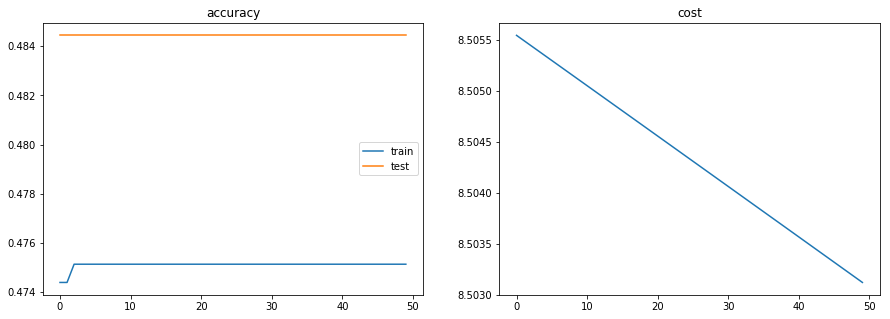

In [116]:
# 学习率过小，5000步之后准确率几乎没变化，损失只降低了0.0025，斜率没有变小，没有收敛
num_iterations = 5000
learning_rate = 1e-7
d = model(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), num_iterations, learning_rate, False)
plot_curve(d)

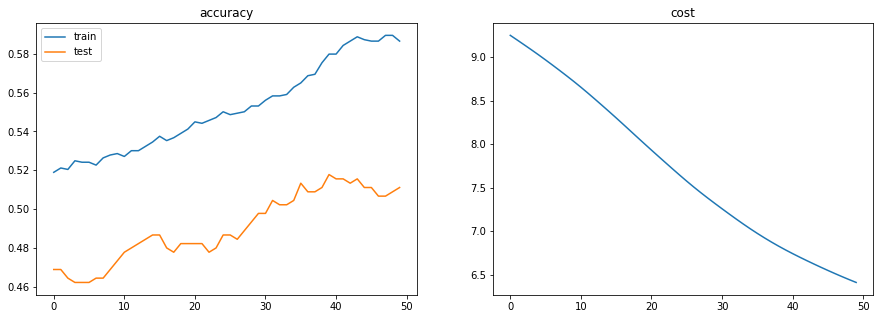

In [121]:
# 学习率较小，准确率有所上升，损失下降0.6，依然没有收敛
num_iterations = 5000
learning_rate = 1e-5
d = model(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), num_iterations, learning_rate, False)
plot_curve(d)

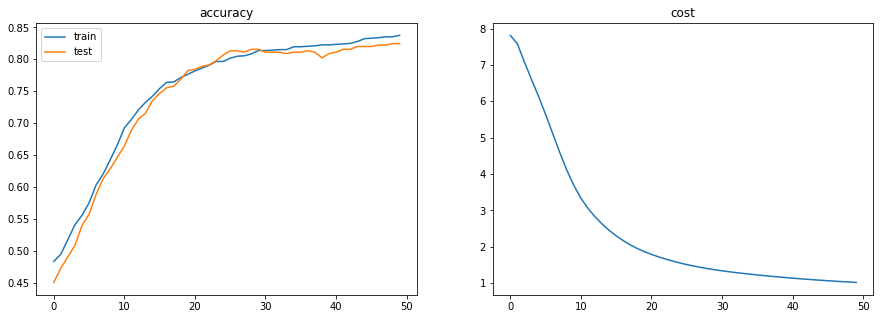

In [118]:
# 学习率适中，准确率一直在提高，最后趋于平缓；损失开始下降速度较快，最后也逐渐减小，基本收敛
num_iterations = 5000
learning_rate = 1e-3
d = model(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), num_iterations, learning_rate, False)
plot_curve(d)

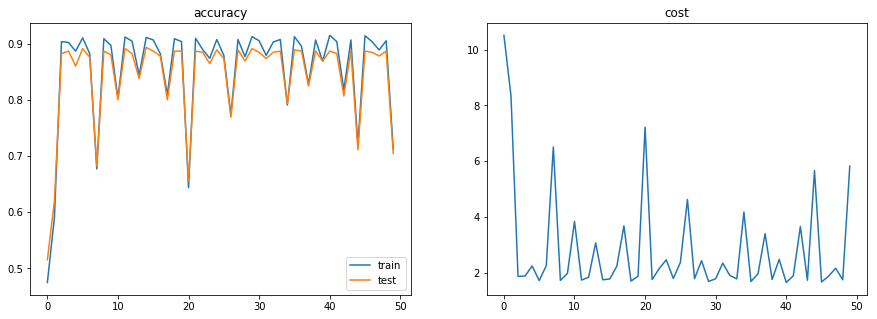

In [119]:
# 学习率过大时，准确率和损失一直在大幅上下震荡，说明有overshooting的现象，无法收敛
num_iterations = 5000
learning_rate = 1
d = model(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), num_iterations, learning_rate, False)
plot_curve(d)

##### 4.2 Observe the effect of iteration_num on the test accuracy.

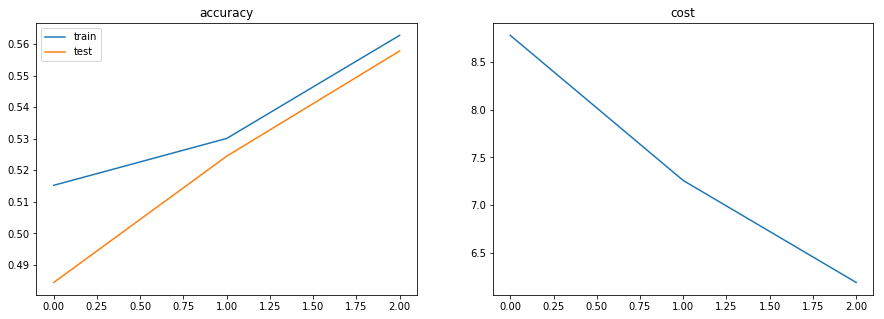

In [129]:
# 迭代次数过少时，准确率上升速度和损失下降速度都很快，结束时还没有收敛
num_iterations = 300
learning_rate = 1e-3
d = model(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), num_iterations, learning_rate, False)
plot_curve(d)

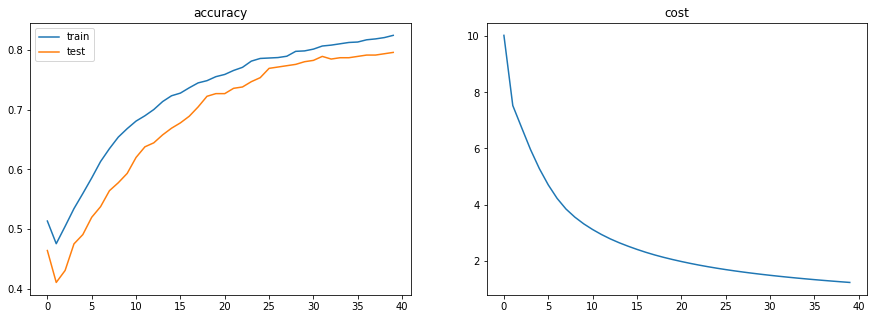

In [133]:
# 迭代次数适中时，算法收敛，且运行速度较快
num_iterations = 4000
learning_rate = 1e-3
d = model(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), num_iterations, learning_rate, False)
plot_curve(d)

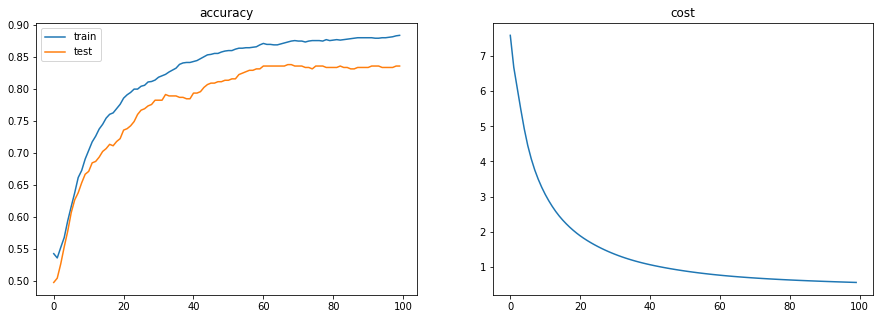

In [131]:
# 迭代次数过大时，运行速度更长，准确率提高和损失下降比迭代4000次时的优化提高比较小
num_iterations = 10000
learning_rate = 1e-3
d = model(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), num_iterations, learning_rate, False)
plot_curve(d)

# Challenge ! ! !

The original data have images labeled 0,1,2,3,4,5,6,7,8,9. In our logistic model, we only detect if the digit in the image is larger or smaller than 5. Now, Let's go for a more challenging problem. Try to use softmax function to build a model to recognize which digit (0,1,2,3,4,5,6,7,8,9) is in the image.

In [134]:
# Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25)

In [199]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate,print_cost):
    """
    Build the logistic regression model by calling all the functions you have implemented.
    Arguments:
    X_train - training set, shape(m,64)
    Y_train - training label, shape(m,10)
    X_test - test set, shape(m_test, 64)
    Y_test - test label, shape(m_test,10)
    num_iteration - hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d - dictionary should contain following information w,b,training_accuracy, test_accuracy,cost
    eg: d = {"w":w,
             "b":b,
             "training_accuracy": traing_accuracy,
             "test_accuracy":test_accuracy,
             "cost":cost}
    """
    # init parameters
    w = np.random.randn(X_train.shape[1], 10) # w.shape=(64, 10)
    b = np.zeros(10)
    
    # init cost list and accuracy list
    costs = []
    training_accuracy = []
    test_accuracy = []
    
    # small number for cross entropy calculation
    epsilon = 1e-9
    
    # init prediction list
    pred_train = np.zeros((X_train.shape[0],1))
    pred_test = np.zeros((X_test.shape[0],1))
    
    # training
    m = X_train.shape[0]
    for n in range(num_iterations):
        # forward
        ## linear
        z = np.dot(X_train,w) + b
        ## Activation
        ##### softmax #####
        z_max = np.max(z, axis=1)
        z = z - z_max.reshape(-1,1)
        numerator = np.exp(z) # shape=(m, 10)
        denominator = np.sum(numerator,axis=1).reshape(-1,1) # shape=(m, 1)
        A = numerator / (denominator+epsilon) # shape=(m, 10)
        
        # cost
        if n % 100 == 0:
            # cost = -1.0/m * (np.dot(Y_train.T, np.log(A+epsilon)) + np.dot((1-Y_train.T), np.log(1-A+epsilon)))
            ##### cross entropy #####
            cost = -1.0/m * np.sum([np.log(A[i][y_i]+epsilon) for i,y_i in enumerate(Y_train)])
            cost = np.squeeze(cost)
            costs.append(cost)
            ## print cost
            if print_cost:
                print("Cost at iteration {}: {}".format(n+1, cost))
        
        # accuracy
        if n % 100 == 0:
            w_ = w.reshape(X_train.shape[1],10)
            ## training accuracy
            for i in range(A.shape[0]):
                ##### choose the number with highest probability #####
                pred_train[i][0] = np.argmax(A[i])
            accuracy = np.sum(pred_train == Y_train) / len(Y_train)
            training_accuracy.append(accuracy)
            ## test accuracy
            z_ = np.dot(X_test,w) + b
            ##### softmax #####
            z_max_ = np.max(z_, axis=1)
            z_ = z_ - z_max_.reshape(-1,1)
            numerator = np.exp(z_)
            denominator = np.sum(numerator,axis=1).reshape(-1,1)
            A_ = numerator/(denominator+epsilon)
            for i in range(A_.shape[0]):
                ##### choose the number with highest probability #####
                pred_test[i][0] = np.argmax(A_[i])
            accuracy = np.sum(pred_test == Y_test) / len(Y_test)
            test_accuracy.append(accuracy)
        
        # backward
        ## calculate gradients
        dz = np.array([A[i][y_i] - 1 for i, y_i in enumerate(Y_train)]) # dz = a - y
        dw = 1.0/m * np.dot(X_train.T, dz)
        if n == 0:
            print(dz)
        db = 1.0/m * np.sum(dz,axis=0)
        ## update parameters
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
    # result
    d = {
            "w": w,
            "b": b,
            "training_accuracy": training_accuracy,
            "test_accuracy": test_accuracy,
            "costs": costs
        }
    return d

In [200]:
num_iterations = 1000
learning_rate = 1
d = model(X_train, y_train.reshape(-1,1), X_test, y_test.reshape(-1,1), num_iterations, learning_rate, True)

Cost at iteration 1: 16.693925924835572
[[-1.00000000e+00]
 [-1.00000008e-09]
 [-8.85543138e-06]
 ...
 [-1.00000000e+00]
 [-1.00000000e+00]
 [-1.00000000e+00]]
Cost at iteration 101: 16.693925924835458
Cost at iteration 201: 16.693925924835014
Cost at iteration 301: 16.693925924839043
Cost at iteration 401: 16.69392592483541
Cost at iteration 501: 16.6939259248375
Cost at iteration 601: 16.693925924837067
Cost at iteration 701: 16.6939259248314
Cost at iteration 801: 16.693925924831824
Cost at iteration 901: 16.693925924827038


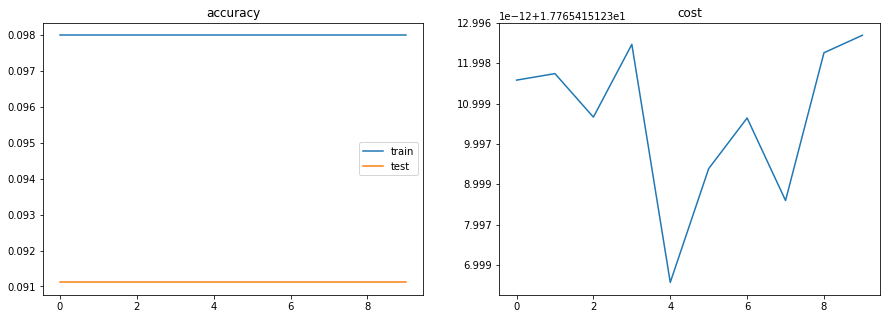

In [198]:
plot_curve(d)

# Congratulations ! You have completed assigment 4. 